In [ ]:
 
import pandas as pd
url = "https://drive.google.com/uc?id=1jZdkMEzXLJ4IOpdMNdHGNWMNOi6tZ7sr&export=download"
# load dataset into Pandas DataFrame owid-covid-data.csv     d/1jZdkMEzXLJ4IOpdMNdHGNWMNOi6tZ7sr   d/1jZdkMEzXLJ4IOpdMNdHGNWMNOi6tZ7sr
# https://drive.google.com/uc?id=1jZdkMEzXLJ4IOpdMNdHGNWMNOi6tZ7sr&export=download 
df = pd.read_csv(url, names=['total_cases','new_cases','total_deaths','new_deaths','target'])

In [ ]:
df.head()

,total_cases,new_cases,total_deaths,new_deaths,target
0,5,5,0,0,Asia
1,5,0,0,0,Asia
2,5,0,0,0,Asia
3,5,0,0,0,Asia
4,5,0,0,0,Asia


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['total_cases','new_cases','total_deaths','new_deaths']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x[:5]

array([[5, 5, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0]])

In [ ]:
x = StandardScaler().fit_transform(x)
x[:5]

array([[-0.1627661 , -0.13564733, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-0.333859,0.043887
1,-0.333888,0.043853
2,-0.333888,0.043853
3,-0.333888,0.043853
4,-0.333888,0.043853


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,target
0,-0.333859,0.043887,Asia
1,-0.333888,0.043853,Asia
2,-0.333888,0.043853,Asia
3,-0.333888,0.043853,Asia
4,-0.333888,0.043853,Asia


In [ ]:
import matplotlib.pyplot as plt

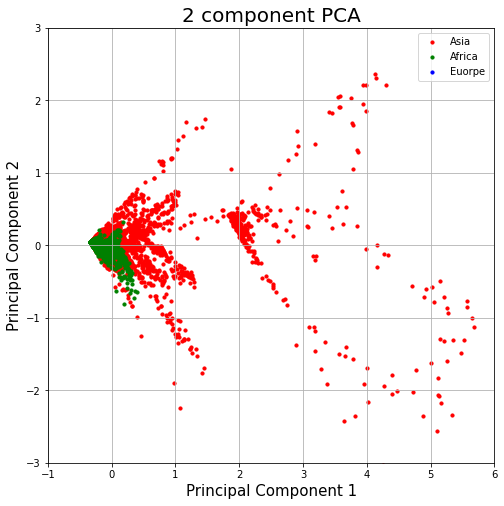

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.set_xlim(-1, 6) 
ax.set_ylim(-3, 3) 
targets = ['Asia', 'Africa','Euorpe']
colors = ['r', 'g','b' ]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()


我分析的是新冠肺炎的死亡人數以及新死亡人數分布的位置、亞洲、非洲，及ㄡ